Обучение модели с L2-регуляризацией...
Обучение модели без L2-регуляризации...


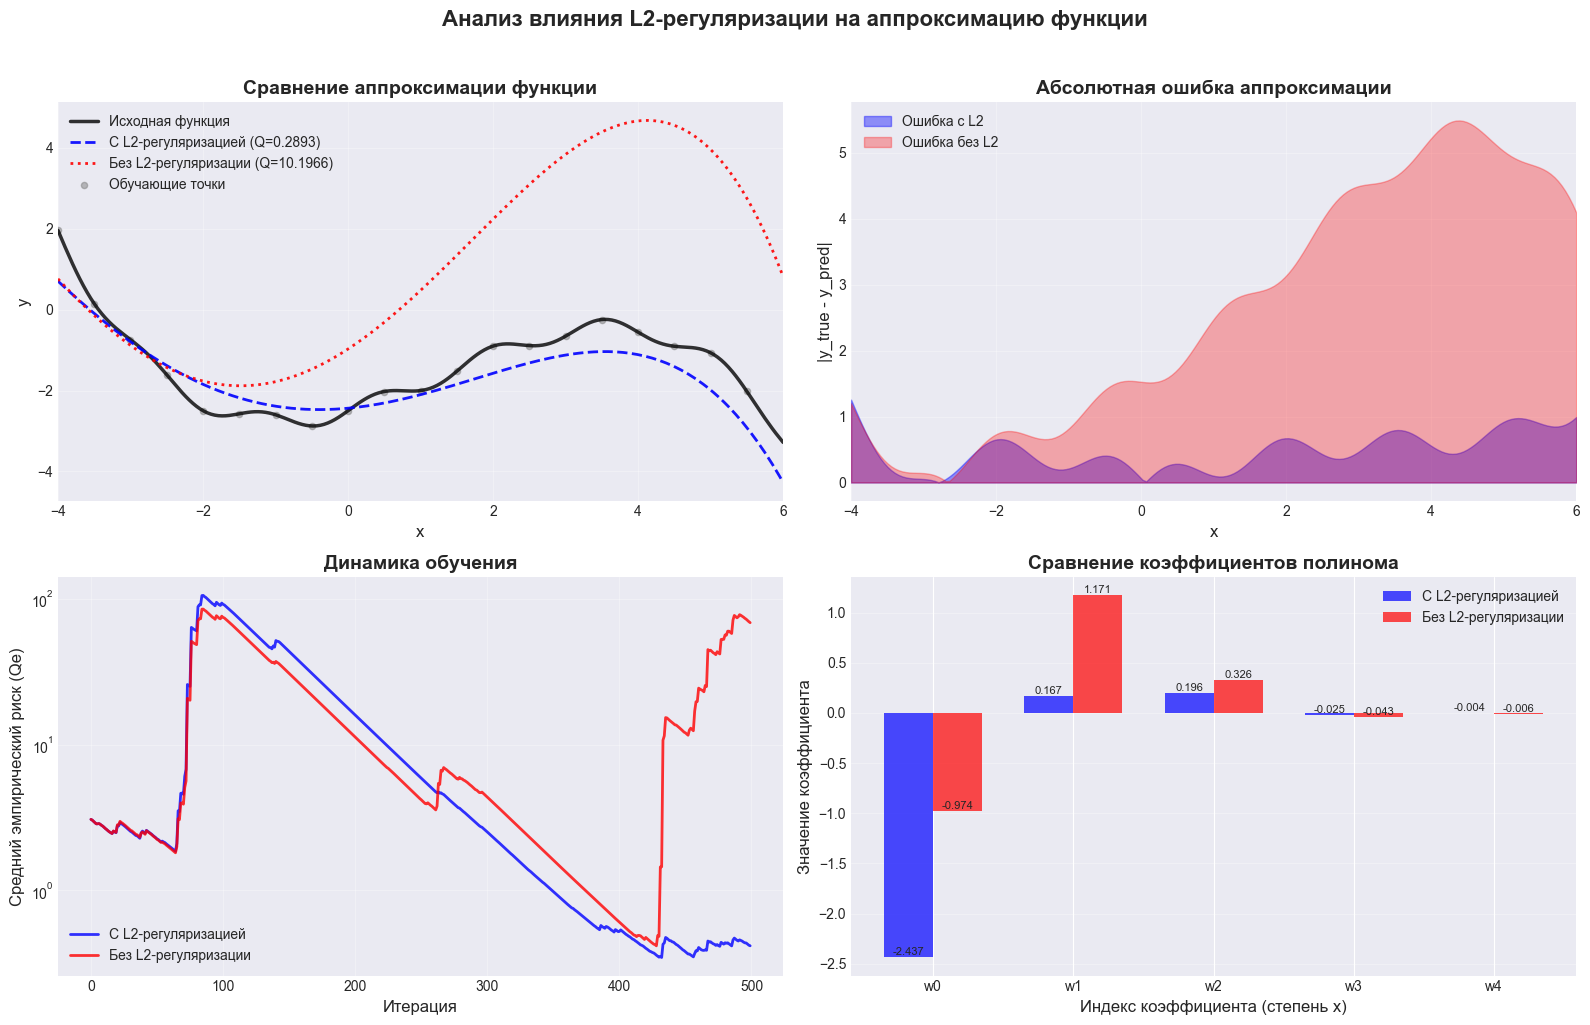


РЕЗУЛЬТАТЫ АНАЛИЗА

Средний эмпирический риск:
  С L2-регуляризацией:    Q = 0.289283
  Без L2-регуляризации:   Q = 10.196591
  Разница:                ΔQ = 9.907308

Коэффициенты полинома с L2-регуляризацией:
  w0 = -2.43711
  w1 =  0.16674
  w2 =  0.19593
  w3 = -0.02461
  w4 = -0.00353

Коэффициенты полинома без L2-регуляризации:
  w0 = -0.97405
  w1 =  1.17091
  w2 =  0.32593
  w3 = -0.04270
  w4 = -0.00598

Средняя абсолютная ошибка на тестовом интервале:
  С L2-регуляризацией:    MAE = 0.462337
  Без L2-регуляризации:   MAE = 2.609533

Максимальная абсолютная ошибка:
  С L2-регуляризацией:    Max Error = 1.254971
  Без L2-регуляризации:   Max Error = 5.487378


ВЫВОД: L2-регуляризация улучшила качество аппроксимации,
       снизив средний эмпирический риск и предотвратив переобучение.


In [69]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) Определяем исходную функцию
# -----------------------------
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5

# -----------------------------
# 2) Определяем модель аппроксимации
# -----------------------------
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv

# -----------------------------
# 3) Функция потерь (квадратичная)
# -----------------------------
def loss(w, x, y):
    return (model(w, x) - y) ** 2

# -----------------------------
# 4) Производная функции потерь по w
# -----------------------------
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    return 2 * (model(w, x) - y) * xv

# -----------------------------
# 5) Функция обучения модели
# -----------------------------
def train_model(coord_x, coord_y, use_l2=True, lm_l2=2):
    N = 5
    sz = len(coord_x)
    eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002])
    w = np.zeros(N)
    n_iter = 500
    lm = 0.02
    batch_size = 20
    
    Qe = np.mean([loss(w, x, y) for x, y in zip(coord_x, coord_y)])
    np.random.seed(0)
    
    # Для сохранения истории ошибок
    history = []
    
    for i in range(n_iter):
        k = np.random.randint(0, sz-batch_size-1)
        batch_x = coord_x[k:k+batch_size]
        batch_y = coord_y[k:k+batch_size]
        
        # L2-регуляризация
        tilde_w = w.copy()
        tilde_w[0] = 0
        
        # Вычисляем градиент
        grad_sum = 0
        for j in range(k, k + batch_size):
            grad_sum += dL(w, coord_x[j], coord_y[j])
        grad = grad_sum / batch_size
        
        # Обновляем скользящее среднее
        Qk = np.mean([loss(w, x, y) for x, y in zip(batch_x, batch_y)])
        Qe = lm * Qk + (1 - lm) * Qe
        history.append(Qe)
        
        # Обновляем веса
        if use_l2:
            w = w - eta * (grad + lm_l2 * tilde_w)
        else:
            w = w - eta * grad
    
    Q = np.mean([loss(w, x, y) for x, y in zip(coord_x, coord_y)])
    
    return w, Q, history

# -----------------------------
# 6) Формируем обучающую выборку
# -----------------------------
coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)

# -----------------------------
# 7) Обучаем модели
# -----------------------------
print("Обучение модели с L2-регуляризацией...")
w_with_l2, Q_with_l2, history_with_l2 = train_model(coord_x, coord_y, use_l2=True, lm_l2=2)

print("Обучение модели без L2-регуляризации...")
w_without_l2, Q_without_l2, history_without_l2 = train_model(coord_x, coord_y, use_l2=False)

# -----------------------------
# 8) Формируем данные для визуализации
# -----------------------------
x_plot = np.linspace(-4, 6, 200)
y_true = func(x_plot)
y_pred_with_l2 = np.array([model(w_with_l2, x) for x in x_plot])
y_pred_without_l2 = np.array([model(w_without_l2, x) for x in x_plot])

# -----------------------------
# 9) Создаем красивую визуализацию
# -----------------------------
plt.style.use('seaborn-v0_8-darkgrid')
fig = plt.figure(figsize=(16, 10))

# График 1: Сравнение аппроксимаций
ax1 = plt.subplot(2, 2, 1)
ax1.plot(x_plot, y_true, 'k-', linewidth=2.5, label='Исходная функция', alpha=0.8)
ax1.plot(x_plot, y_pred_with_l2, 'b--', linewidth=2, label=f'С L2-регуляризацией (Q={Q_with_l2:.4f})', alpha=0.9)
ax1.plot(x_plot, y_pred_without_l2, 'r:', linewidth=2, label=f'Без L2-регуляризации (Q={Q_without_l2:.4f})', alpha=0.9)
ax1.scatter(coord_x[::5], coord_y[::5], c='gray', s=20, alpha=0.5, label='Обучающие точки')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Сравнение аппроксимации функции', fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-4, 6)

# График 2: Ошибки аппроксимации
ax2 = plt.subplot(2, 2, 2)
error_with_l2 = np.abs(y_true - y_pred_with_l2)
error_without_l2 = np.abs(y_true - y_pred_without_l2)
ax2.fill_between(x_plot, 0, error_with_l2, alpha=0.4, color='blue', label='Ошибка с L2')
ax2.fill_between(x_plot, 0, error_without_l2, alpha=0.3, color='red', label='Ошибка без L2')
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('|y_true - y_pred|', fontsize=12)
ax2.set_title('Абсолютная ошибка аппроксимации', fontsize=14, fontweight='bold')
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-4, 6)

# График 3: История обучения
ax3 = plt.subplot(2, 2, 3)
iterations = range(len(history_with_l2))
ax3.plot(iterations, history_with_l2, 'b-', linewidth=2, label='С L2-регуляризацией', alpha=0.8)
ax3.plot(iterations, history_without_l2, 'r-', linewidth=2, label='Без L2-регуляризации', alpha=0.8)
ax3.set_xlabel('Итерация', fontsize=12)
ax3.set_ylabel('Средний эмпирический риск (Qe)', fontsize=12)
ax3.set_title('Динамика обучения', fontsize=14, fontweight='bold')
ax3.legend(loc='best', fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_yscale('log')

# График 4: Коэффициенты модели
ax4 = plt.subplot(2, 2, 4)
x_pos = np.arange(len(w_with_l2))
width = 0.35
bars1 = ax4.bar(x_pos - width/2, w_with_l2, width, label='С L2-регуляризацией', color='blue', alpha=0.7)
bars2 = ax4.bar(x_pos + width/2, w_without_l2, width, label='Без L2-регуляризации', color='red', alpha=0.7)

# Добавляем значения на столбцы
for bar in bars1:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontsize=8)

ax4.set_xlabel('Индекс коэффициента (степень x)', fontsize=12)
ax4.set_ylabel('Значение коэффициента', fontsize=12)
ax4.set_title('Сравнение коэффициентов полинома', fontsize=14, fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'w{i}' for i in range(len(w_with_l2))])
ax4.legend(loc='best', fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

plt.suptitle('Анализ влияния L2-регуляризации на аппроксимацию функции', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# -----------------------------
# 10) Выводим статистику
# -----------------------------
print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ АНАЛИЗА")
print("="*60)

print(f"\nСредний эмпирический риск:")
print(f"  С L2-регуляризацией:    Q = {Q_with_l2:.6f}")
print(f"  Без L2-регуляризации:   Q = {Q_without_l2:.6f}")
print(f"  Разница:                ΔQ = {abs(Q_with_l2 - Q_without_l2):.6f}")

print(f"\nКоэффициенты полинома с L2-регуляризацией:")
for i, w_val in enumerate(w_with_l2):
    print(f"  w{i} = {w_val:8.5f}")

print(f"\nКоэффициенты полинома без L2-регуляризации:")
for i, w_val in enumerate(w_without_l2):
    print(f"  w{i} = {w_val:8.5f}")

print(f"\nСредняя абсолютная ошибка на тестовом интервале:")
mae_with_l2 = np.mean(np.abs(y_true - y_pred_with_l2))
mae_without_l2 = np.mean(np.abs(y_true - y_pred_without_l2))
print(f"  С L2-регуляризацией:    MAE = {mae_with_l2:.6f}")
print(f"  Без L2-регуляризации:   MAE = {mae_without_l2:.6f}")

print(f"\nМаксимальная абсолютная ошибка:")
max_error_with_l2 = np.max(np.abs(y_true - y_pred_with_l2))
max_error_without_l2 = np.max(np.abs(y_true - y_pred_without_l2))
print(f"  С L2-регуляризацией:    Max Error = {max_error_with_l2:.6f}")
print(f"  Без L2-регуляризации:   Max Error = {max_error_without_l2:.6f}")

print("\n" + "="*60)

# Вывод о влиянии L2-регуляризации
if Q_with_l2 < Q_without_l2:
    print("\nВЫВОД: L2-регуляризация улучшила качество аппроксимации,")
    print("       снизив средний эмпирический риск и предотвратив переобучение.")
else:
    print("\nВЫВОД: Модель без L2-регуляризации показала лучший результат")
    print("       на обучающей выборке, но это может указывать на переобучение.")